### **Code** : **PV Smart-Metering Basic Analysis of variables**
- Writer : Donghyeon Kim
- Date : 2022.08.02
- Data : 태양광 사용가구 '김OO'
- Reason : 1,440개의 행(60분 X 24시간)을 가장 많이 지니고 있는 가구이므로 선정함.

<hr>

### **0. Running the library and setting up the foundation**

In [1]:
# 1. 라이브러리 실행
from pathlib import Path
import os
import pandas as pd
import numpy as np 
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. 파일의 상위-상위 경로 설정
os_root = Path(os.path.join(os.getcwd(), '6. variable_analysis_detail.ipynb'))
root = os_root.parent.parent

#### **User Data**

In [3]:
# 3. 사용자 데이터 호출
# User data 폴더
user_folder_root = os.path.join(root, 'data_revised_hour')

# xlsx 파일 이름
xlsx_name = user_folder_root + '\\' + '김OO_dataset_revised_hour.xlsx'

# 데이터 호출
df_user = pd.read_excel(xlsx_name)

In [4]:
df_user.head(24)

,date,year,month,day,hour,그리드 소비(kWh),수출 된 에너지(kWh),에너지 수율(kWh)
0,2021-03-01 00:59:00,2021,3,1,0,0.200001,0.000000,0.000000
1,2021-03-01 01:59:00,2021,3,1,1,0.250000,0.000000,0.000000
2,2021-03-01 02:59:00,2021,3,1,2,0.210003,0.000000,0.000000
3,2021-03-01 03:59:00,2021,3,1,3,0.180000,0.000000,0.000000
4,2021-03-01 04:59:00,2021,3,1,4,0.190002,0.000000,0.000000
5,2021-03-01 05:59:00,2021,3,1,5,0.200001,0.000000,0.000000
6,2021-03-01 06:59:00,2021,3,1,6,0.299999,0.000000,0.000000
7,2021-03-01 07:59:00,2021,3,1,7,0.270000,0.000000,0.000000
8,2021-03-01 08:59:00,2021,3,1,8,0.399998,0.000000,0.000000
9,2021-03-01 09:59:00,2021,3,1,9,0.219997,0.000000,0.050003


In [5]:
# Merge를 위한 column filtering
df_user_filter = df_user.drop(['date'], axis = 1)

In [6]:
df_user_filter.head(24)

,year,month,day,hour,그리드 소비(kWh),수출 된 에너지(kWh),에너지 수율(kWh)
0,2021,3,1,0,0.200001,0.000000,0.000000
1,2021,3,1,1,0.250000,0.000000,0.000000
2,2021,3,1,2,0.210003,0.000000,0.000000
3,2021,3,1,3,0.180000,0.000000,0.000000
4,2021,3,1,4,0.190002,0.000000,0.000000
5,2021,3,1,5,0.200001,0.000000,0.000000
6,2021,3,1,6,0.299999,0.000000,0.000000
7,2021,3,1,7,0.270000,0.000000,0.000000
8,2021,3,1,8,0.399998,0.000000,0.000000
9,2021,3,1,9,0.219997,0.000000,0.050003


<hr>

### **Existing Analysis : 1. Basic Analysis of variables by data**

#### **<Data 1 : Weather Data>**

#### **1) Data Pre-processing**

In [7]:
# weather data 폴더
weather_folder_root = os.path.join(root, 'data_weather')

# csv 파일 이름
csv_name = weather_folder_root + '\\' + 'keei_ldaps.csv'

# 데이터 호출
df_weather = pd.read_csv(csv_name, encoding='cp949')

In [8]:
# 데이터 정제
df_weather['dt'] = pd.to_datetime(df_weather['dt'], format='%Y/%m/%d %H:%M:%S')
df_weather['year'] = df_weather['dt'].dt.year
df_weather['month'] = df_weather['dt'].dt.month
df_weather['day'] = df_weather['dt'].dt.day
df_weather['hour'] = df_weather['dt'].dt.hour

In [9]:
# 태양광 사용 가구 : '김OO'
df_weather_use = df_weather[df_weather.owner == '김OO']

In [10]:
# Data Merge
df_weather_use = pd.merge(df_weather_use, df_user_filter, how='left', on=['year', 'month', 'day', 'hour'])

In [11]:
# Column 이름 변경
df_weather_use.rename(columns={'그리드 소비(kWh)': 'grid_kWh', '수출 된 에너지(kWh)': 'export_kWh', '에너지 수율(kWh)': 'yield_kWh'}, inplace=True)

In [12]:
df_weather_use.drop(['owner', 'id_hh', 'id_hs'], axis=1).tail(10)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,place,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
13840,2022-04-30 15:00:00+09:00,289.807922,1.103254,2.136642,243.770538,0.0,75.599068,0.006213,서울,2022,4,30,15,0.000000,0.370117,0.680176
13841,2022-04-30 16:00:00+09:00,290.679688,3.716064,0.633899,284.969421,0.0,70.625931,0.006306,서울,2022,4,30,16,0.000000,0.319824,0.470215
13842,2022-04-30 17:00:00+09:00,289.007690,3.104170,1.623195,331.664551,0.0,78.621765,0.005859,서울,2022,4,30,17,0.020020,0.130127,0.370117
13843,2022-04-30 18:00:00+09:00,287.392883,2.541556,1.322166,187.572693,0.0,80.893768,0.005859,서울,2022,4,30,18,0.100098,0.070068,0.180176
13844,2022-04-30 19:00:00+09:00,285.536194,1.803355,2.358898,50.007076,0.0,84.606339,0.005744,서울,2022,4,30,19,0.709961,0.000000,0.000000
13845,2022-04-30 20:00:00+09:00,284.207703,1.945932,1.498594,1.366211,0.0,87.228836,0.005584,서울,2022,4,30,20,0.290039,0.000000,0.000000
13846,2022-04-30 21:00:00+09:00,282.821838,0.995493,1.326086,0.000000,0.0,85.965973,0.005168,서울,2022,4,30,21,0.320068,0.000000,0.000000
13847,2022-04-30 22:00:00+09:00,281.902527,0.671311,1.957892,0.000000,0.0,83.123375,0.005127,서울,2022,4,30,22,0.260010,0.000000,0.000000
13848,2022-04-30 23:00:00+09:00,281.104187,0.343318,2.047524,0.000000,0.0,80.482849,0.004883,서울,2022,4,30,23,0.209961,0.000000,0.000000
13849,2022-05-01 00:00:00+09:00,280.501892,0.750398,1.590288,0.000000,0.0,77.866310,0.004686,서울,2022,5,1,0,NaN,NaN,NaN


In [13]:
df_weather_use.loc[:, 'ym'] = df_weather_use.year.astype(str) + '/' + df_weather_use.month.astype(str)

In [14]:
# 데이터에 해당하는 연도 / 21년도에 해당하는 월 / 22년도에 해당하는 월
# 데이터 기간 : 2021.03 ~ 2022.04
d_year = [2021, 2022]
d_month_21 = range(3, 12+1)
d_month_22 = range(1, 4+1)

In [15]:
# 2021.03 ~ 2022.04 기간에 해당하는 데이터만 필터링
for y in d_year:
    count = 0
    if y == 2021:
        for ma in d_month_21:
            temp = df_weather_use[(df_weather_use.year == y) & (df_weather_use.month == ma)]
            if count == 0:
                result = temp
                count += 1
            else:
                result = pd.concat([result, temp])
    elif y == 2022:
        for mb in d_month_22:
            temp = df_weather_use[(df_weather_use.year == y) & (df_weather_use.month == mb)]
            result = pd.concat([result, temp])

df_weather_use = result

In [16]:
# 온도(temperature) 변환
# 기존 형태 : Kelvin(켈빈 온도) -> 변경하고자 하는 형태 : 섭씨 온도
# 섭씨 온도와 켈빈 온도 관계식 : 0(C) + 273.15(K) = 273.15(K)

df_weather_use.temperature = df_weather_use.temperature - 273.15

In [17]:
df_weather_use.drop(['owner', 'id_hh', 'id_hs'], axis=1).head(24)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,place,year,month,day,hour,grid_kWh,export_kWh,yield_kWh,ym
3625,2021-03-01 00:00:00+09:00,10.322687,0.858208,0.041718,0.000000,0.000000,60.644928,0.004421,서울,2021,3,1,0,0.200001,0.000000,0.000000,2021/3
3626,2021-03-01 01:00:00+09:00,10.029108,0.135828,-1.085083,0.000000,0.000000,56.432068,0.004188,서울,2021,3,1,1,0.250000,0.000000,0.000000,2021/3
3627,2021-03-01 02:00:00+09:00,9.844873,0.362611,-0.180941,0.000000,0.000000,62.081512,0.004626,서울,2021,3,1,2,0.210003,0.000000,0.000000,2021/3
3628,2021-03-01 03:00:00+09:00,9.587915,-0.411156,0.997797,0.000000,0.000000,56.335152,0.004261,서울,2021,3,1,3,0.180000,0.000000,0.000000,2021/3
3629,2021-03-01 04:00:00+09:00,9.564752,-0.462263,-0.222837,0.000000,0.000000,61.451012,0.004599,서울,2021,3,1,4,0.190002,0.000000,0.000000,2021/3
3630,2021-03-01 05:00:00+09:00,9.363092,0.721948,-2.010242,0.000000,0.000000,64.313083,0.004559,서울,2021,3,1,5,0.200001,0.000000,0.000000,2021/3
3631,2021-03-01 06:00:00+09:00,8.639551,-1.163785,-1.346743,0.000000,2.439514,92.884331,0.005859,서울,2021,3,1,6,0.299999,0.000000,0.000000,2021/3
3632,2021-03-01 07:00:00+09:00,8.481317,-0.673493,-1.971651,0.000000,1.226685,94.962051,0.006039,서울,2021,3,1,7,0.270000,0.000000,0.000000,2021/3
3633,2021-03-01 08:00:00+09:00,8.494592,-1.207814,-0.468723,3.883789,1.170898,93.874001,0.005951,서울,2021,3,1,8,0.399998,0.000000,0.000000,2021/3
3634,2021-03-01 09:00:00+09:00,8.613031,-5.542665,1.533955,18.028790,0.239624,88.038452,0.005981,서울,2021,3,1,9,0.219997,0.000000,0.050003,2021/3


In [18]:
# 1분 단위 -> 1일 단위 데이터로 변경

print('1일 단위 데이터로 변경 시작')

# 1) 결과 Dictionary 생성
weather_time = {}
weather_time['year'] = [] # 연도
weather_time['month'] = [] # 월
weather_time['day'] = [] # 일
weather_time['temperature'] = [] # 온도
weather_time['uws_10m'] = [] # x축 풍속(10m 고도)
weather_time['vws_10m'] = [] # y축 풍속(10m 고도)
weather_time['ghi'] = [] # 일사량
weather_time['precipitation'] = [] # 강수량
weather_time['relative_humidity_1p5m'] = [] # 상대습도(1.5m 고도)
weather_time['specific_humidity_1p5m'] = [] # 절대습도(1.5m 고도)

# 2) 연도 필터링
u_year = df_weather_use.year.unique()

# 3) 연도 -> 월 -> 일 필터링 진행
for y in u_year:
    day_filter1 = df_weather_use[df_weather_use.year == y]
    
    # 월 필터링
    u_month = day_filter1.month.unique()
    
    for m in u_month:
        day_filter2 = day_filter1[day_filter1.month == m]
        
        # 일 필터링
        u_day = day_filter2.day.unique()
        
        for d in u_day:
            day_filter3 = day_filter2[day_filter2.day == d]
            
            # 4) 각 변수별 적절한 통계치 설정(mean, sum 등)
            tmp = np.mean(day_filter3.temperature)
            uws = np.mean(day_filter3.uws_10m)
            vws = np.mean(day_filter3.vws_10m)
            ghi = np.sum(day_filter3.ghi)
            prec = np.sum(day_filter3.precipitation)
            rel_humid = np.mean(day_filter3.relative_humidity_1p5m)
            spec_humid = np.mean(day_filter3.specific_humidity_1p5m)
            
            # 5) 결과 Dictionary에 값 대입
            weather_time['year'].append(y)
            weather_time['month'].append(m)
            weather_time['day'].append(d)
            weather_time['temperature'].append(tmp)
            weather_time['uws_10m'].append(uws)
            weather_time['vws_10m'].append(vws)
            weather_time['ghi'].append(ghi)
            weather_time['precipitation'].append(prec)
            weather_time['relative_humidity_1p5m'].append(rel_humid)
            weather_time['specific_humidity_1p5m'].append(spec_humid)
    
df_weather_final = pd.DataFrame(weather_time)
print('1일 단위 데이터로 변경 완료')

1일 단위 데이터로 변경 시작
1일 단위 데이터로 변경 완료


In [19]:
df_weather_final.loc[:, 'ym'] = df_weather_final.year.astype(str) + '/' + df_weather_final.month.astype(str)

In [20]:
df_weather_final.head(10)

,year,month,day,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,ym
0,2021,3,1,8.919155,-1.736407,-0.162616,286.444231,57.434692,84.125891,0.005725,2021/3
1,2021,3,2,4.992891,0.314676,-2.043070,3881.830132,0.064941,69.686652,0.003057,2021/3
2,2021,3,3,5.865526,-0.040978,1.120929,4184.417839,0.000000,68.823934,0.003290,2021/3
3,2021,3,4,7.885524,-0.649182,1.242777,2709.822544,0.000000,65.751899,0.004110,2021/3
4,2021,3,5,9.139801,1.099768,-0.691771,4451.292202,0.000000,77.935111,0.004660,2021/3
5,2021,3,6,8.497615,-0.739030,-0.535698,2570.391235,0.000000,73.328921,0.004252,2021/3
6,2021,3,7,8.145973,0.575023,-0.228959,4423.887798,0.000000,65.821113,0.003503,2021/3
7,2021,3,8,8.444373,0.748325,-0.460115,4691.263340,0.000000,64.222694,0.003498,2021/3
8,2021,3,9,8.268987,1.356441,0.035522,4155.732078,0.000000,68.381816,0.003813,2021/3
9,2021,3,10,9.805317,0.527724,-0.261270,4781.561859,0.000000,68.913090,0.004243,2021/3


#### **2) Variable Analysis - '일사량'**

#### (1) Scatter Plot

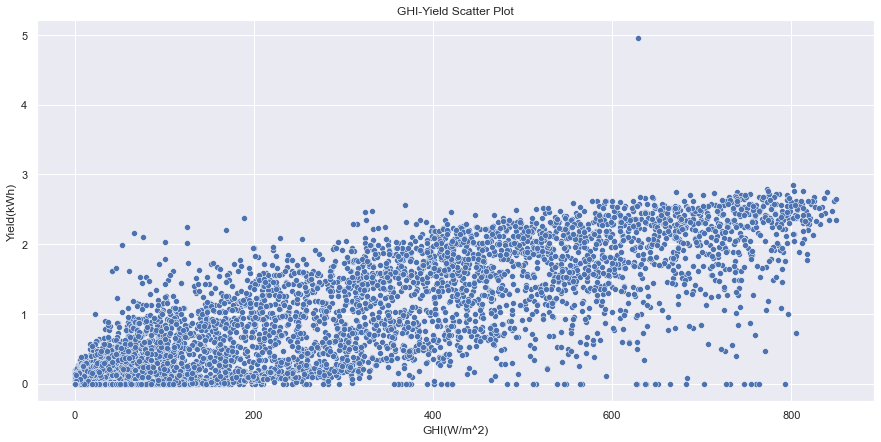

In [21]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='ghi', y='yield_kWh', data=df_weather_use)
plt.title("GHI-Yield Scatter Plot")
plt.xlabel("GHI(W/m^2)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

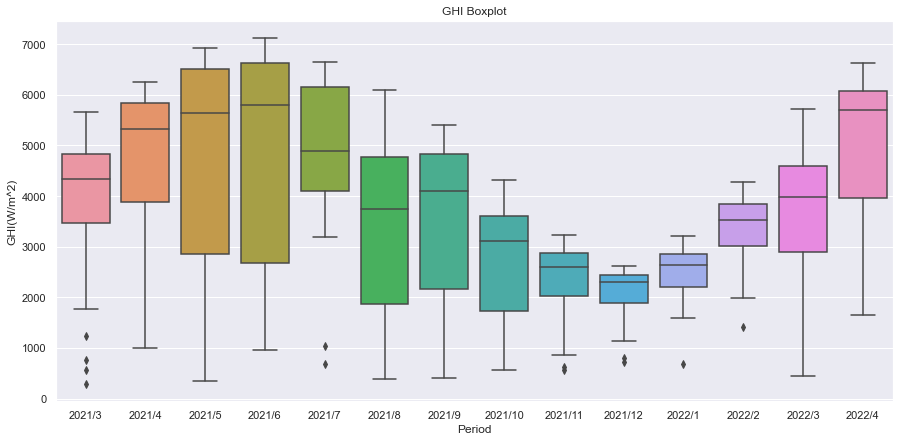

In [22]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='ghi', x='ym', data=df_weather_final)
plt.title("GHI Boxplot")
plt.xlabel("Period")
plt.ylabel("GHI(W/m^2)")
plt.show()

#### (3) Basic Statistics

In [23]:
# iloc method : 2021.03 ~ 2022.04
df_weather_final.groupby(['ym']).describe()['ghi'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,3860.592450,1511.614782,286.444231,3474.875992,4331.052973,4825.243501,5669.466400
2021/4,30.0,4688.293484,1614.793165,1003.089457,3874.977740,5332.333769,5843.313577,6257.655823
2021/5,31.0,4657.254080,2224.996207,349.386770,2863.840403,5632.127293,6506.701042,6928.879822
2021/6,30.0,4851.450606,2060.625286,954.334532,2668.818876,5798.527733,6638.787077,7121.581156
2021/7,31.0,4819.262413,1496.020200,683.126162,4108.256296,4895.473454,6153.457510,6654.776936
2021/8,31.0,3399.380657,1768.786948,385.297813,1861.837170,3737.006737,4772.452767,6087.984177
2021/9,30.0,3529.729195,1582.800639,404.267596,2161.602855,4106.360709,4839.371898,5397.189071
2022/1,31.0,2485.814798,570.014932,689.669174,2208.805740,2630.778721,2851.905045,3217.328514
2022/2,28.0,3348.485275,709.066031,1411.303634,3009.762659,3519.354919,3837.622552,4274.394417


#### **3) Variable Analysis - '온도'**

#### (1) Scatter Plot

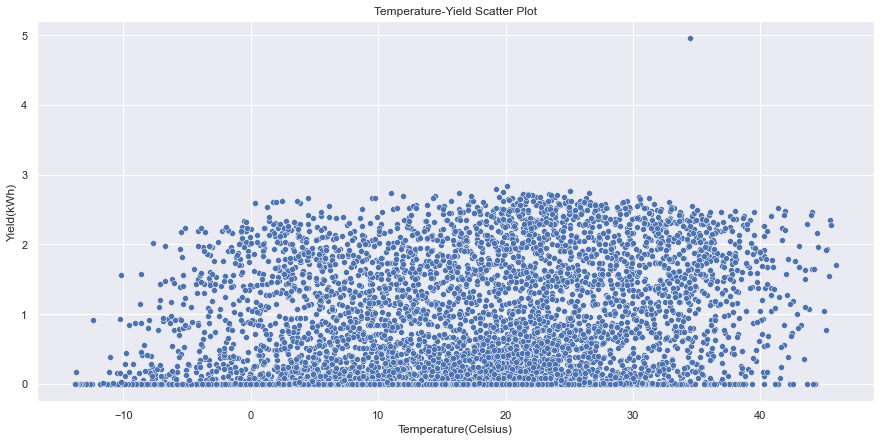

In [24]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='temperature', y='yield_kWh', data=df_weather_use)
plt.title("Temperature-Yield Scatter Plot")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

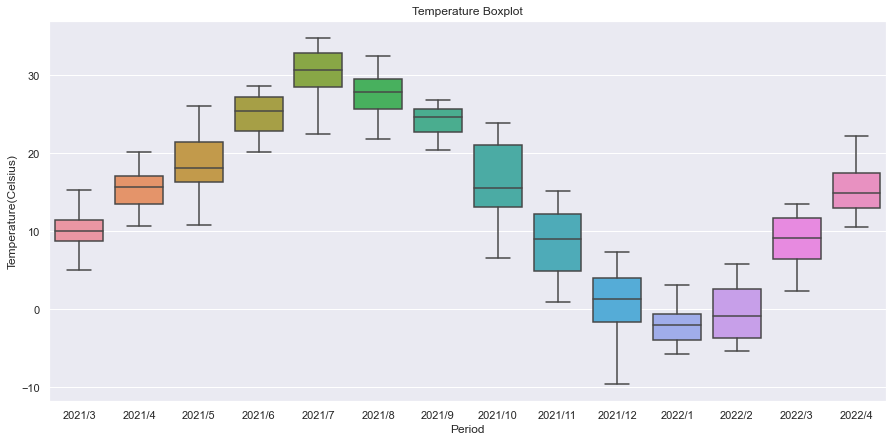

In [25]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='temperature', x='ym', data=df_weather_final)
plt.title("Temperature Boxplot")
plt.xlabel("Period")
plt.ylabel("Temperature(Celsius)")
plt.show()

#### (3) Basic Statistics

In [26]:
# iloc method : 2021.03 ~ 2022.04
df_weather_final.groupby(['ym']).describe()['temperature'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,10.133769,2.381789,4.992891,8.708385,10.016485,11.433576,15.261175
2021/4,30.0,15.466460,2.568734,10.670572,13.483818,15.700511,17.057753,20.183846
2021/5,31.0,18.861826,3.570850,10.801873,16.337334,18.135520,21.460241,26.018458
2021/6,30.0,25.133784,2.554054,20.107743,22.825967,25.456379,27.253023,28.637984
2021/7,31.0,30.496752,3.199052,22.475266,28.495174,30.694840,32.832470,34.742825
2021/8,31.0,27.535790,2.810996,21.852351,25.651594,27.869564,29.502716,32.472133
2021/9,30.0,24.156810,1.959582,20.453994,22.735360,24.655346,25.686759,26.791372
2022/1,31.0,-1.877354,2.311476,-5.702507,-3.912507,-1.974861,-0.570796,3.134847
2022/2,28.0,-0.585899,3.325288,-5.327558,-3.643950,-0.918984,2.585775,5.789713


<hr>

#### **<Data 2 : Visibility Data>**

#### **1) Data Pre-processing**

In [27]:
# ASOS data 폴더
asos_folder_root = os.path.join(root, 'data_ASOS')

# csv 파일 이름
csv_file_name = ['OBS_ASOS_TIM_1.csv', 'OBS_ASOS_TIM_2.csv']

# 데이터 호출
for i in range(len(csv_file_name)):
    csv_name = asos_folder_root + '\\' + csv_file_name[i]
    if i == 0:
        df_asos = pd.read_csv(csv_name, encoding='cp949')
    else:
        temp = pd.read_csv(csv_name, encoding='cp949')
        df_asos = pd.concat([df_asos, temp])

In [28]:
df_asos['일시'] = pd.to_datetime(df_asos['일시'], format='%Y/%m/%d %H:%M:%S')
df_asos['year'] = df_asos['일시'].dt.year
df_asos['month'] = df_asos['일시'].dt.month
df_asos['day'] = df_asos['일시'].dt.day
df_asos['hour'] = df_asos['일시'].dt.hour

In [29]:
df_asos.head(10)

,지점,지점명,일시,시정(10m),year,month,day,hour
0,90,속초,2021-03-01 00:00:00,2000,2021,3,1,0
1,90,속초,2021-03-01 01:00:00,2000,2021,3,1,1
2,90,속초,2021-03-01 02:00:00,2000,2021,3,1,2
3,90,속초,2021-03-01 03:00:00,1951,2021,3,1,3
4,90,속초,2021-03-01 04:00:00,1877,2021,3,1,4
5,90,속초,2021-03-01 05:00:00,1630,2021,3,1,5
6,90,속초,2021-03-01 06:00:00,713,2021,3,1,6
7,90,속초,2021-03-01 07:00:00,794,2021,3,1,7
8,90,속초,2021-03-01 08:00:00,716,2021,3,1,8
9,90,속초,2021-03-01 09:00:00,906,2021,3,1,9


In [30]:
# 지점명 체크
df_asos['지점명'].unique()

array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '홍성', '제주', '고산',
       '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '정선군', '제천',
       '보은', '천안', '보령', '부여', '금산', '세종', '부안', '임실', '정읍', '남원', '장수',
       '고창군', '영광군', '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '장흥', '해남',
       '고흥', '의령군', '함양군', '광양시', '진도군', '봉화', '영주', '문경', '청송군', '영덕',
       '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해'],
      dtype=object)

In [31]:
# '김OO' 가구 위치는 '서울'이므로 해당 지역으로 필터링
df_asos_filter = df_asos[df_asos['지점명'] == '서울']

In [32]:
# Data Merge
df_asos_filter = pd.merge(df_asos_filter, df_user_filter, how='left', on=['year', 'month', 'day', 'hour'])

In [33]:
# Column 이름 변경
df_asos_filter.rename(columns={'그리드 소비(kWh)': 'grid_kWh', '수출 된 에너지(kWh)': 'export_kWh',
                               '에너지 수율(kWh)': 'yield_kWh', '시정(10m)': 'visibility', '지점명': 'place'}, inplace=True)

In [34]:
df_asos_filter = df_asos_filter.drop(['지점', '일시'], axis = 1)

In [35]:
df_asos_filter.head(24)

,place,visibility,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
0,서울,2000,2021,3,1,0,0.200001,0.000000,0.000000
1,서울,2000,2021,3,1,1,0.250000,0.000000,0.000000
2,서울,2000,2021,3,1,2,0.210003,0.000000,0.000000
3,서울,2000,2021,3,1,3,0.180000,0.000000,0.000000
4,서울,447,2021,3,1,4,0.190002,0.000000,0.000000
5,서울,1303,2021,3,1,5,0.200001,0.000000,0.000000
6,서울,587,2021,3,1,6,0.299999,0.000000,0.000000
7,서울,381,2021,3,1,7,0.270000,0.000000,0.000000
8,서울,381,2021,3,1,8,0.399998,0.000000,0.000000
9,서울,294,2021,3,1,9,0.219997,0.000000,0.050003


In [36]:
# 1시간 단위 -> 1일 단위 데이터로 변경

print('1일 단위 데이터로 변경 시작')

# 1) 결과 Dictionary 생성
visi_time = {}
visi_time['year'] = [] # 연도
visi_time['month'] = [] # 월
visi_time['day'] = [] # 일
visi_time['visibility'] = [] # 시정

# 2) 연도 필터링
u_year = df_weather_use.year.unique()

# 3) 연도 -> 월 -> 일 필터링
for y in u_year:
    day_filter1 = df_asos_filter[df_asos_filter.year == y]
    
    # 월 필터링
    u_month = day_filter1.month.unique()
    
    for m in u_month:
        day_filter2 = day_filter1[day_filter1.month == m]
        
        # 일 필터링
        u_day = day_filter2.day.unique()
        
        for d in u_day:
            day_filter3 = day_filter2[day_filter2.day == d]
            
            # 4) 시정 변수 평균 구하기
            vis = np.mean(day_filter3.visibility)
            
            # 5) 결과 Dictionary에 값 대입
            visi_time['year'].append(y)
            visi_time['month'].append(m)
            visi_time['day'].append(d)
            visi_time['visibility'].append(vis)
    
visi_time_final = pd.DataFrame(visi_time)
print('1일 단위 데이터로 변경 완료')

1일 단위 데이터로 변경 시작
1일 단위 데이터로 변경 완료


In [37]:
visi_time_final.loc[:, 'ym'] = visi_time_final.year.astype(str) + '/' + visi_time_final.month.astype(str)

In [38]:
visi_time_final.head(10)

,year,month,day,visibility,ym
0,2021,3,1,769.291667,2021/3
1,2021,3,2,1935.666667,2021/3
2,2021,3,3,1972.000000,2021/3
3,2021,3,4,1946.875000,2021/3
4,2021,3,5,1768.750000,2021/3
5,2021,3,6,1646.291667,2021/3
6,2021,3,7,1987.916667,2021/3
7,2021,3,8,1886.250000,2021/3
8,2021,3,9,1902.083333,2021/3
9,2021,3,10,820.500000,2021/3


#### **2) Variable Analysis - '시정'**

#### (1) Scatter Plot

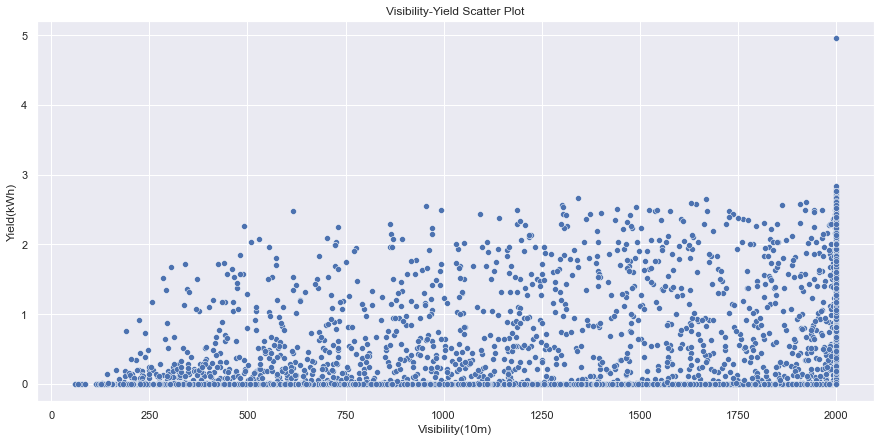

In [39]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='visibility', y='yield_kWh', data=df_asos_filter)
plt.title("Visibility-Yield Scatter Plot")
plt.xlabel("Visibility(10m)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

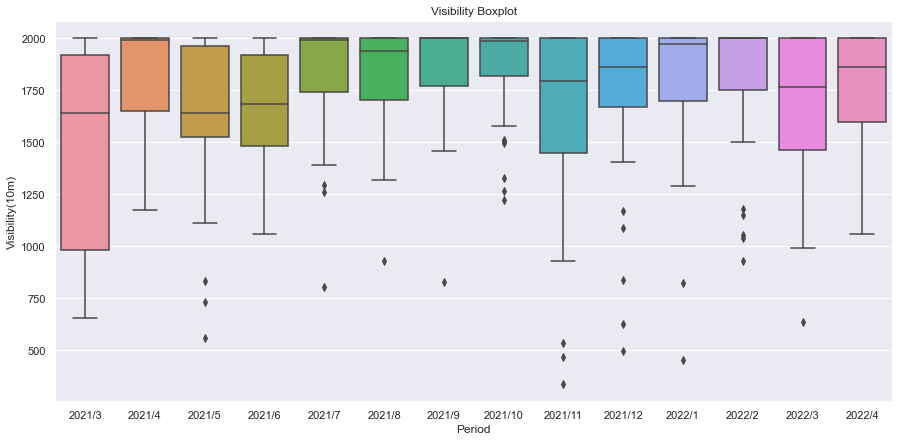

In [40]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='visibility', x='ym', data=visi_time_final)
plt.title("Visibility Boxplot")
plt.xlabel("Period")
plt.ylabel("Visibility(10m)")
plt.show()

#### (3) Basic Statistics

In [41]:
# iloc method : 2021.03 ~ 2022.04
visi_time_final.groupby(['ym']).describe()['visibility'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,1477.162634,484.522340,656.875000,979.083333,1637.625000,1918.875000,2000.0
2021/4,30.0,1815.469444,254.997942,1174.583333,1648.031250,1990.187500,2000.000000,2000.0
2021/5,31.0,1620.830645,400.871323,556.583333,1524.166667,1638.500000,1961.270833,2000.0
2021/6,30.0,1655.452778,280.882246,1056.500000,1482.437500,1684.416667,1917.593750,2000.0
2021/7,31.0,1816.673387,297.988846,803.083333,1742.500000,1991.666667,2000.000000,2000.0
2021/8,31.0,1825.365591,257.110591,926.250000,1702.125000,1938.375000,2000.000000,2000.0
2021/9,30.0,1860.731944,252.326563,826.333333,1768.989583,2000.000000,2000.000000,2000.0
2022/1,31.0,1759.418011,374.220072,451.666667,1696.229167,1970.500000,2000.000000,2000.0
2022/2,28.0,1782.857143,358.914222,926.208333,1749.583333,1998.916667,2000.000000,2000.0


<hr>

### **2. Further Analysis : variables by data**

#### **1) Scatter Plot(Yield, Hour) by month**

In [42]:
df_weather_use.drop(['owner', 'id_hh', 'id_hs'], axis=1).head(24)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,place,year,month,day,hour,grid_kWh,export_kWh,yield_kWh,ym
3625,2021-03-01 00:00:00+09:00,10.322687,0.858208,0.041718,0.000000,0.000000,60.644928,0.004421,서울,2021,3,1,0,0.200001,0.000000,0.000000,2021/3
3626,2021-03-01 01:00:00+09:00,10.029108,0.135828,-1.085083,0.000000,0.000000,56.432068,0.004188,서울,2021,3,1,1,0.250000,0.000000,0.000000,2021/3
3627,2021-03-01 02:00:00+09:00,9.844873,0.362611,-0.180941,0.000000,0.000000,62.081512,0.004626,서울,2021,3,1,2,0.210003,0.000000,0.000000,2021/3
3628,2021-03-01 03:00:00+09:00,9.587915,-0.411156,0.997797,0.000000,0.000000,56.335152,0.004261,서울,2021,3,1,3,0.180000,0.000000,0.000000,2021/3
3629,2021-03-01 04:00:00+09:00,9.564752,-0.462263,-0.222837,0.000000,0.000000,61.451012,0.004599,서울,2021,3,1,4,0.190002,0.000000,0.000000,2021/3
3630,2021-03-01 05:00:00+09:00,9.363092,0.721948,-2.010242,0.000000,0.000000,64.313083,0.004559,서울,2021,3,1,5,0.200001,0.000000,0.000000,2021/3
3631,2021-03-01 06:00:00+09:00,8.639551,-1.163785,-1.346743,0.000000,2.439514,92.884331,0.005859,서울,2021,3,1,6,0.299999,0.000000,0.000000,2021/3
3632,2021-03-01 07:00:00+09:00,8.481317,-0.673493,-1.971651,0.000000,1.226685,94.962051,0.006039,서울,2021,3,1,7,0.270000,0.000000,0.000000,2021/3
3633,2021-03-01 08:00:00+09:00,8.494592,-1.207814,-0.468723,3.883789,1.170898,93.874001,0.005951,서울,2021,3,1,8,0.399998,0.000000,0.000000,2021/3
3634,2021-03-01 09:00:00+09:00,8.613031,-5.542665,1.533955,18.028790,0.239624,88.038452,0.005981,서울,2021,3,1,9,0.219997,0.000000,0.050003,2021/3


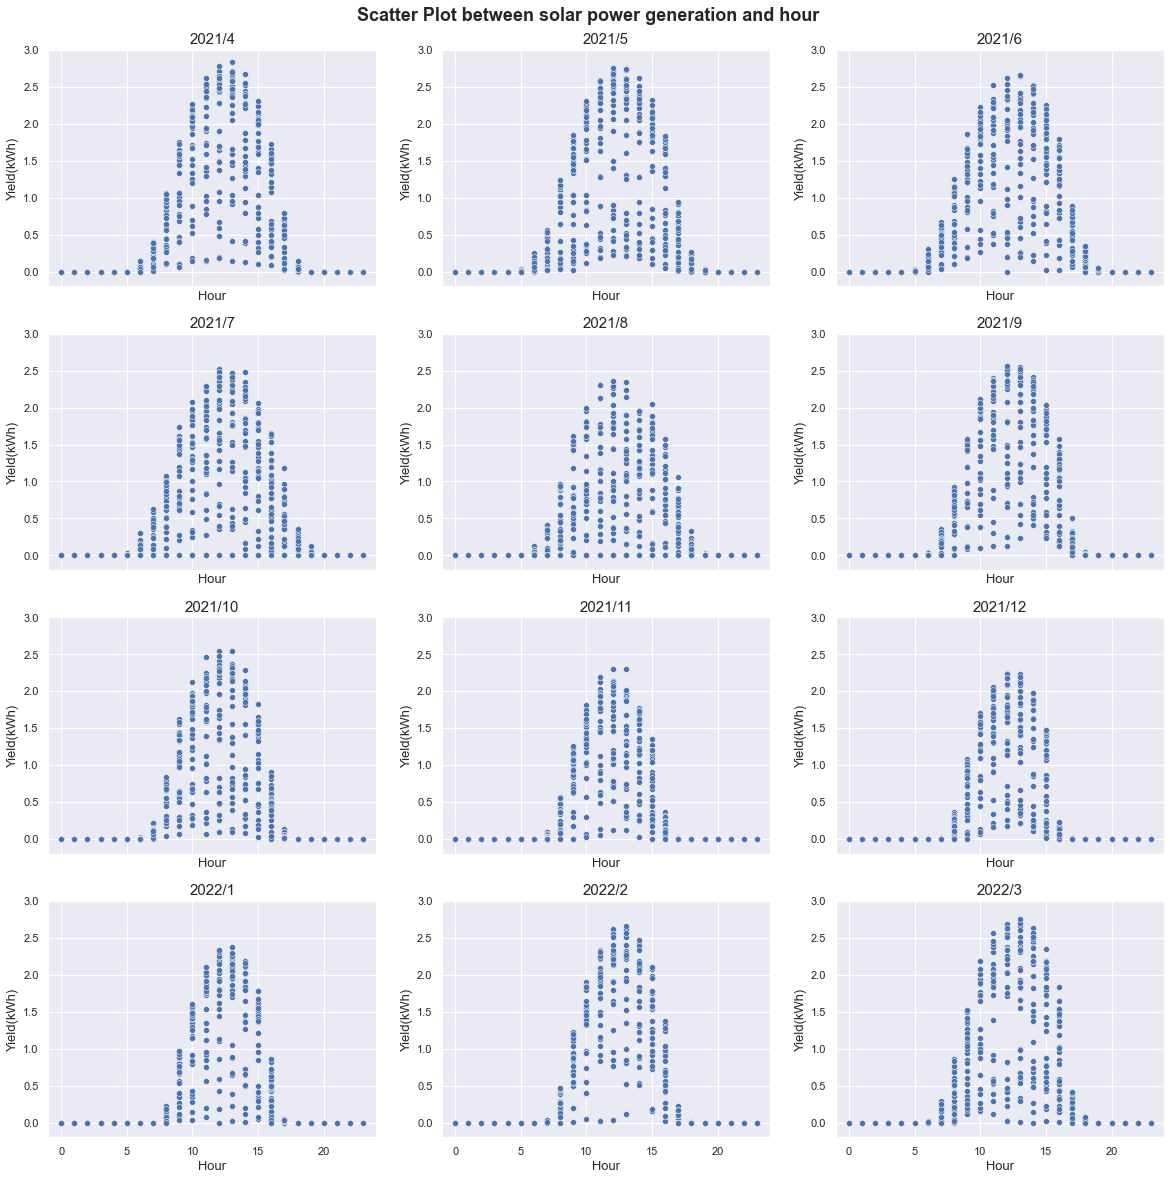

In [43]:
date_list = df_weather_use.ym.unique().tolist()
date_list = date_list[1:-1] # 2021/3, 2022/4 제외

fig = plt.figure(figsize=(20, 20))
fig.suptitle('Scatter Plot between solar power generation and hour', y=0.91, fontsize=18, fontweight='bold')

for i in range(len(date_list)):
    df_weather_use_f = df_weather_use[df_weather_use.ym == date_list[i]]
    
    if i not in [9, 10, 11]:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(hspace = 0.2)
        plt.xlim(-1.0, 24.0)
        plt.ylim(-0.2, 3.0)
        sns.scatterplot(x='hour', y='yield_kWh', data=df_weather_use_f, ax=ax)
        plt.title(f'{date_list[i]}', fontsize=15)
        plt.xlabel("Hour", fontsize=13)
        plt.ylabel("Yield(kWh)", fontsize=13)
        plt.tick_params('x', labelbottom=False)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(hspace = 0.2)
        plt.xlim(-1.0, 24.0)
        plt.ylim(-0.2, 3.0)
        sns.scatterplot(x='hour', y='yield_kWh', data=df_weather_use_f, ax=ax)
        plt.title(f'{date_list[i]}', fontsize=15)
        plt.xlabel("Hour", fontsize=13)
        plt.ylabel("Yield(kWh)", fontsize=13)

#### **2) Scatter Plot(GHI, Yield) by month**

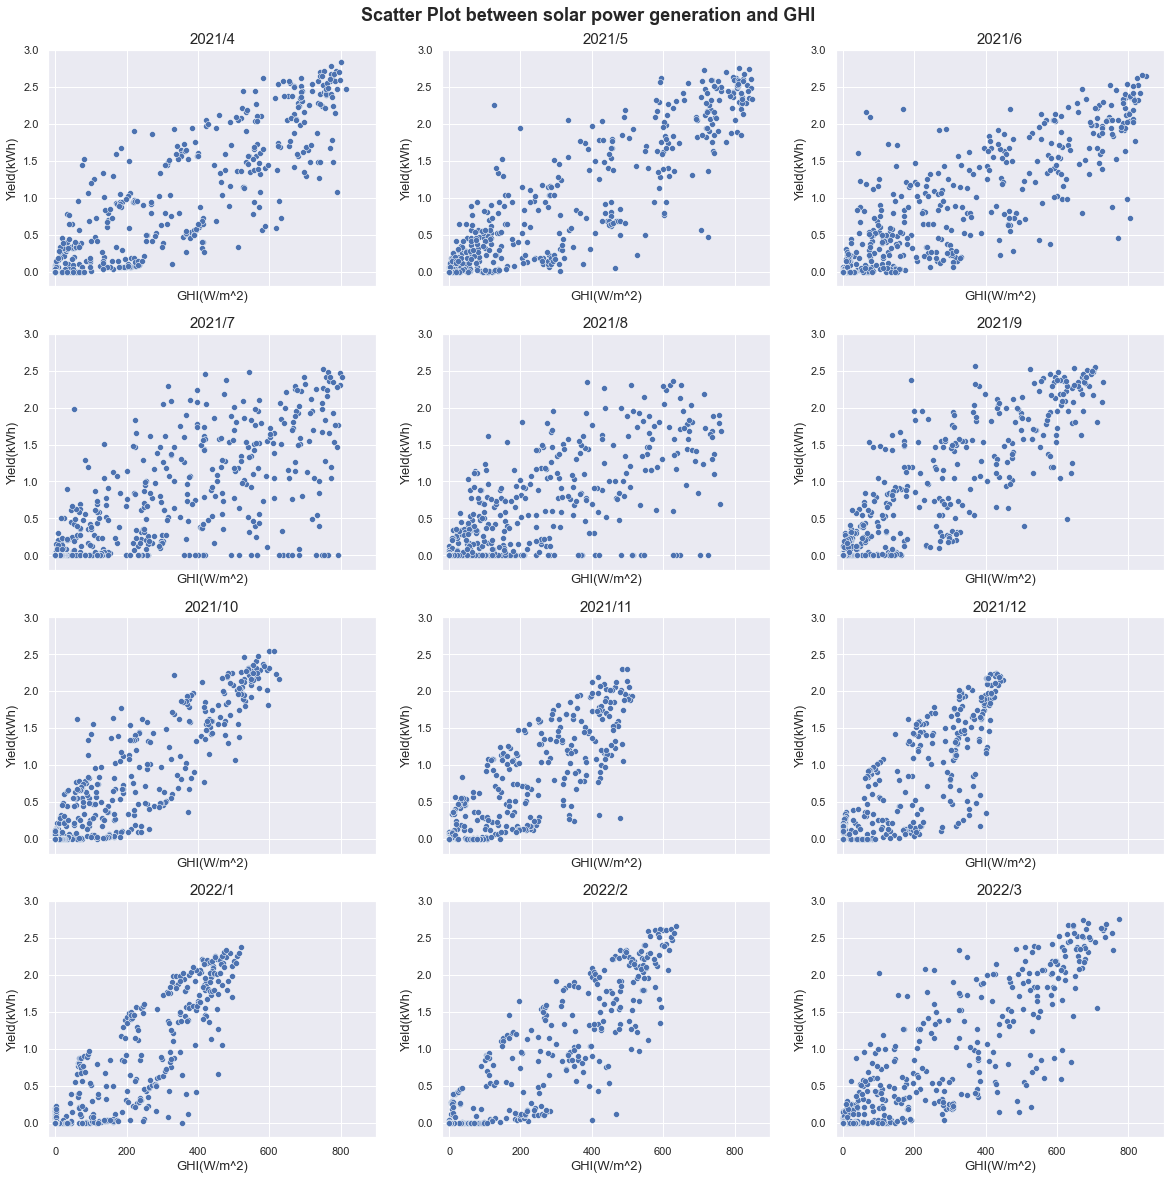

In [44]:
date_list = df_weather_use.ym.unique().tolist()
date_list = date_list[1:-1] # 2021/3, 2022/4 제외

fig = plt.figure(figsize=(20, 20))
fig.suptitle('Scatter Plot between solar power generation and GHI', y=0.91, fontsize=18, fontweight='bold')

for i in range(len(date_list)):
    df_weather_use_f = df_weather_use[df_weather_use.ym == date_list[i]]
    
    if i not in [9, 10, 11]:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(hspace = 0.2)
        plt.xlim(-20.0, 900.0)
        plt.ylim(-0.2, 3.0)
        sns.scatterplot(x='ghi', y='yield_kWh', data=df_weather_use_f, ax=ax)
        plt.title(f'{date_list[i]}', fontsize=15)
        plt.xlabel("GHI(W/m^2)", fontsize=13)
        plt.ylabel("Yield(kWh)", fontsize=13)
        plt.tick_params('x', labelbottom=False)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(hspace = 0.2)
        plt.xlim(-20.0, 900.0)
        plt.ylim(-0.2, 3.0)
        sns.scatterplot(x='ghi', y='yield_kWh', data=df_weather_use_f, ax=ax)
        plt.title(f'{date_list[i]}', fontsize=15)
        plt.xlabel("GHI(W/m^2)", fontsize=13)
        plt.ylabel("Yield(kWh)", fontsize=13)

#### **3) Scatter Plot(Grid Consumption, Hour) by month**

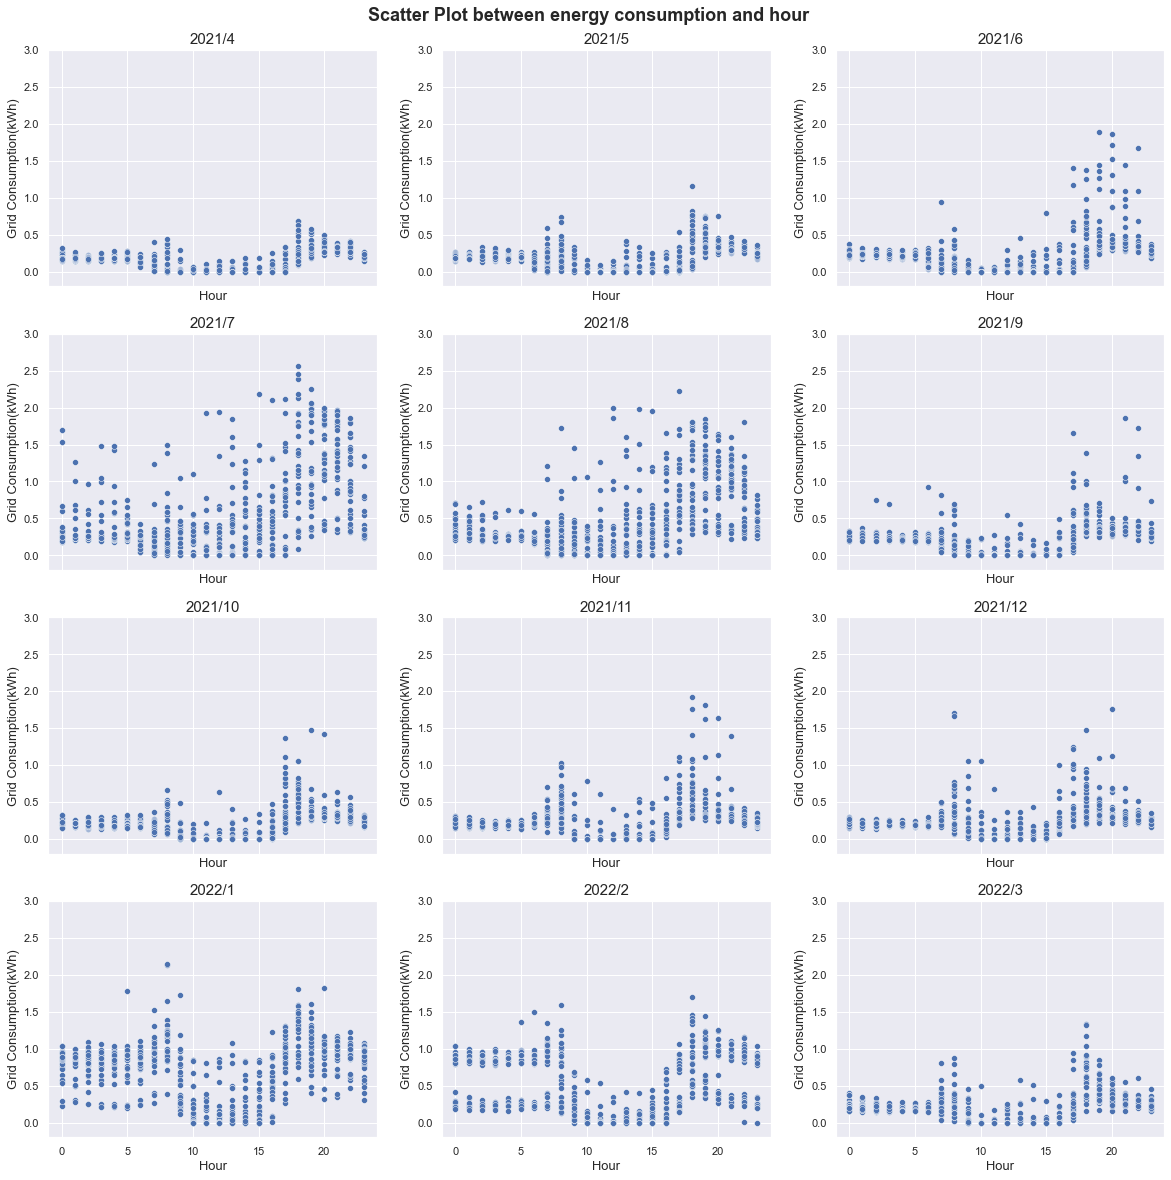

In [45]:
date_list = df_weather_use.ym.unique().tolist()
date_list = date_list[1:-1] # 2021/3, 2022/4 제외

fig = plt.figure(figsize=(20, 20))
fig.suptitle('Scatter Plot between energy consumption and hour', y=0.91, fontsize=18, fontweight='bold')

for i in range(len(date_list)):
    df_weather_use_f = df_weather_use[df_weather_use.ym == date_list[i]]
    
    if i not in [9, 10, 11]:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(hspace = 0.2)
        plt.xlim(-1.0, 24.0)
        plt.ylim(-0.2, 3.0)
        sns.scatterplot(x='hour', y='grid_kWh', data=df_weather_use_f, ax=ax)
        plt.title(f'{date_list[i]}', fontsize=15)
        plt.xlabel("Hour", fontsize=13)
        plt.ylabel("Grid Consumption(kWh)", fontsize=13)
        plt.tick_params('x', labelbottom=False)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(hspace = 0.2)
        plt.xlim(-1.0, 24.0)
        plt.ylim(-0.2, 3.0)
        sns.scatterplot(x='hour', y='grid_kWh', data=df_weather_use_f, ax=ax)
        plt.title(f'{date_list[i]}', fontsize=15)
        plt.xlabel("Hour", fontsize=13)
        plt.ylabel("Grid Consumption(kWh)", fontsize=13)

#### **4) Scatter Plot(GHI, Grid Consumption) by month**

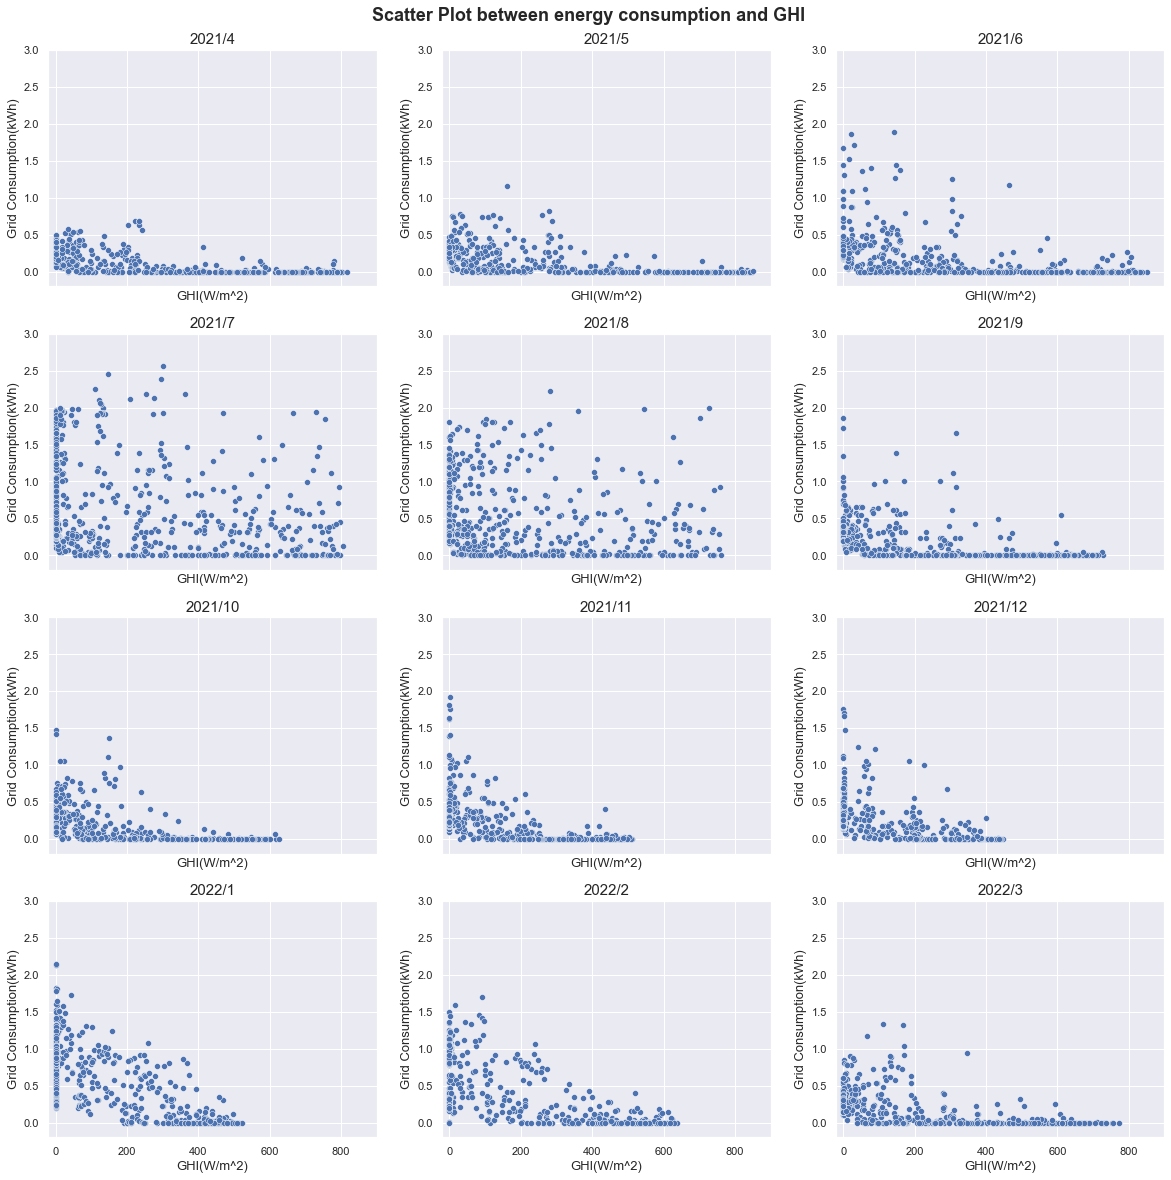

In [46]:
date_list = df_weather_use.ym.unique().tolist()
date_list = date_list[1:-1] # 2021/3, 2022/4 제외

fig = plt.figure(figsize=(20, 20))
fig.suptitle('Scatter Plot between energy consumption and GHI', y=0.91, fontsize=18, fontweight='bold')

for i in range(len(date_list)):
    df_weather_use_f = df_weather_use[df_weather_use.ym == date_list[i]]
    
    if i not in [9, 10, 11]:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(hspace = 0.2)
        plt.xlim(-20.0, 900.0)
        plt.ylim(-0.2, 3.0)
        sns.scatterplot(x='ghi', y='grid_kWh', data=df_weather_use_f, ax=ax)
        plt.title(f'{date_list[i]}', fontsize=15)
        plt.xlabel("GHI(W/m^2)", fontsize=13)
        plt.ylabel("Grid Consumption(kWh)", fontsize=13)
        plt.tick_params('x', labelbottom=False)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(hspace = 0.2)
        plt.xlim(-20.0, 900.0)
        plt.ylim(-0.2, 3.0)
        sns.scatterplot(x='ghi', y='grid_kWh', data=df_weather_use_f, ax=ax)
        plt.title(f'{date_list[i]}', fontsize=15)
        plt.xlabel("GHI(W/m^2)", fontsize=13)
        plt.ylabel("Grid Consumption(kWh)", fontsize=13)